In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [2]:
las = lasio.read('Data/15-9-19_SR_COMP.LAS')

In [3]:
las.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [4]:
las.sections['Version']

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS Log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth ste")]

In [5]:
well = []

for item in las.sections['Well']:
    well.append((item.descr,item.value))
    print(f'{item.descr} ({item.mnemonic}) \t {item.value}')



Top Depth (STRT) 	 102.1568
Bottom Depth (STOP) 	 4636.514
Depth Increment (STEP) 	 0.1524
Null Value (NULL) 	 -999.25
Field Name (FLD) 	 Q15
NAME (WELL) 	 15/9-19
WELLBORE (WBN) 	 15/9-19 SR
COUNTRY (NATI) 	 NOR
COUNTRY (CTRY) 	 NOR
OPERATOR (COMP) 	 STATOIL
PERM DATUM (PDAT) 	 MSL
RIG NAME (COUN) 	 NORTH SEA
STATE (STAT) 	 NORWAY
PB WELL ID (PBWE) 	 15/9-19
PB WELLBORE ID (APIN) 	 15/9-19 SR
PB WELL NAME SET (PBWS) 	 ALL


In [6]:
np.asanyarray(well).shape

(16, 2)

In [7]:
las.well.WELL.value

'15/9-19'

In [8]:
for c in las.curves:
    print(c.mnemonic)

DEPT
AC
CALI
DEN
GR
NEU
RDEP
RMED


In [9]:
for count, c in enumerate(las.curves):
    print(f'Curve:{c.mnemonic}, \t Units:{c.unit}, \t Description:{c.descr}')

print(f'There are: {count+1} curves')

Curve:DEPT, 	 Units:M, 	 Description:1  DEPTH
Curve:AC, 	 Units:US/F, 	 Description:2  Sonic Transit Time (Slowness)
Curve:CALI, 	 Units:IN, 	 Description:3  Caliper
Curve:DEN, 	 Units:G/CC, 	 Description:4  Bulk Density
Curve:GR, 	 Units:GAPI, 	 Description:5  Gamma Ray
Curve:NEU, 	 Units:%, 	 Description:6  Neutron Porosity
Curve:RDEP, 	 Units:OHMM, 	 Description:7  Deep Resistivity
Curve:RMED, 	 Units:OHMM, 	 Description:8  Medium Resistivity
There are: 8 curves


In [10]:
well = las.df()

In [11]:
well.head()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
3615.4340,95.7952,12.7249,2.3429,54.8754,44.5742,0.8941,0.8359
3615.5864,94.2267,12.5961,2.3528,53.5158,62.1103,0.7367,0.8028
3615.7388,101.3254,13.7632,2.3170,48.9803,71.9087,0.6423,0.7958
3615.8912,99.5672,14.3249,2.2585,36.6762,44.8988,0.6571,0.7929
3616.0436,100.5965,11.1429,2.2108,40.4632,49.5744,0.7442,0.7940


In [12]:
well.describe()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


In [13]:
well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 6701 entries, 3615.434 to 4636.514
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      6579 non-null   float64
 1   CALI    6579 non-null   float64
 2   DEN     6656 non-null   float64
 3   GR      6689 non-null   float64
 4   NEU     6668 non-null   float64
 5   RDEP    6701 non-null   float64
 6   RMED    6701 non-null   float64
dtypes: float64(7)
memory usage: 418.8 KB


<AxesSubplot:xlabel='DEPT'>

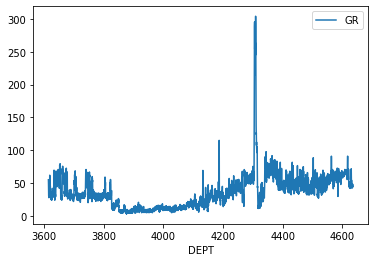

In [14]:
well.plot(y='GR')

<AxesSubplot:xlabel='DEPT'>

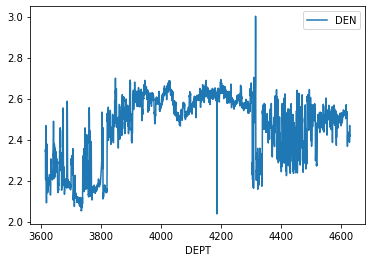

In [15]:
well.plot(y='DEN')

In [22]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as make_subplots

In [17]:
df = lasio.read('Data/15-9-19_SR_COMP.LAS').df()

In [18]:
df.reset_index(inplace=True)

In [19]:
df.describe()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
count,6701.000000,6579.000000,6579.000000,6656.000000,6689.000000,6668.000000,6701.000000,6701.000000
mean,4125.974000,78.313607,9.550656,2.459291,36.048563,17.986061,3.221012,3.081261
std,294.826397,17.009535,0.906267,0.162682,26.705519,11.694084,8.860387,6.306741
min,3615.434000,1.025100,6.000000,2.037700,2.766100,2.178300,0.250300,0.294700
25%,3870.704000,66.169300,9.142900,2.341250,14.852300,10.244475,0.800600,0.844800
50%,4125.974000,74.145900,9.523800,2.514200,32.142600,15.245100,1.770000,1.801400
75%,4381.244000,89.024250,9.904800,2.589800,50.901700,22.952525,3.394000,3.537300
max,4636.514000,149.218700,20.285700,3.001300,304.333700,146.347400,198.537100,115.635000


In [21]:
fig = go.Figure(data=go.Scatter(x=df['DEPT'], y=df['GR']))
fig.update_layout(xaxis_title='DEPTH', yaxis_title='GR')
fig.show()

In [29]:
fig = px.line(df, x='DEPT', y='GR', range_x=[3800,4000], range_y=[0,100])
fig.show()